## Plot the Spectra Aniso with the coresponding QM Aniso

In [370]:
import os
import json
import helpers

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.colors import ListedColormap


from pathlib import Path

import importlib
importlib.reload(helpers) #Reload helpers if necessary


<module 'helpers' from 'c:\\Users\\John\\Desktop\\University of Washington\\Seidler lab\\Factor_Dictionary\\helpers.py'>

Explore FD

In [371]:
#Read in file and turn it into a dataframe
Cr_data_path = "Cr_data/Cr_fd_2_9_2025"
Cu_data_path = "Cu_data/CNN_2625"
Fe_data_path = "Fe_data/CNN_2625"
NiO_stretch_data_path = "Practice_fd_runs/NiO_stretched_structures_fd_2182025"
Cr203_stretch_data_path = "Practice_fd_runs/Cr203_stretched_structures_fd_2212025"

factor_dict_dir_path = Path(Cr203_stretch_data_path)
os.listdir(factor_dict_dir_path)

['Cr2O3_stretch_-0.5_c_factor_dict.json',
 'Cr2O3_stretch_-1.0_c_factor_dict.json',
 'Cr2O3_stretch_-1.5_c_factor_dict.json',
 'Cr2O3_stretch_-10.0_c_factor_dict.json',
 'Cr2O3_stretch_-2.0_c_factor_dict.json',
 'Cr2O3_stretch_-2.5_c_factor_dict.json',
 'Cr2O3_stretch_-3.0_c_factor_dict.json',
 'Cr2O3_stretch_-3.5_c_factor_dict.json',
 'Cr2O3_stretch_-4.0_c_factor_dict.json',
 'Cr2O3_stretch_-4.5_c_factor_dict.json',
 'Cr2O3_stretch_-5.0_c_factor_dict.json',
 'Cr2O3_stretch_-5.5_c_factor_dict.json',
 'Cr2O3_stretch_-6.0_c_factor_dict.json',
 'Cr2O3_stretch_-6.5_c_factor_dict.json',
 'Cr2O3_stretch_-7.0_c_factor_dict.json',
 'Cr2O3_stretch_-7.5_c_factor_dict.json',
 'Cr2O3_stretch_-8.0_c_factor_dict.json',
 'Cr2O3_stretch_-8.5_c_factor_dict.json',
 'Cr2O3_stretch_-9.0_c_factor_dict.json',
 'Cr2O3_stretch_-9.5_c_factor_dict.json',
 'Cr2O3_stretch_0.0_c_factor_dict.json',
 'Cr2O3_stretch_0.5_c_factor_dict.json',
 'Cr2O3_stretch_1.0_c_factor_dict.json',
 'Cr2O3_stretch_1.5_c_factor_dict.js

Print Factor DF

In [372]:
mp374_factor_dict = helpers.print_factor_dict("Cr_data/Cr_fd_2_9_2025/mp-374_factor_dict.json")


Contents of mp-374_factor_dict.json:
--------------------------------------------------
MP-ID: mp-374
Material: CrB2
Space Group: P6/mmm
Space Group Number: 191
band_gap: 0.0
density: 5.3164020273198265
oxidation_states: {'Cr': 6.0, 'B': -3.0}
dipole moment normalized: [-1.3877787807814457e-17, 4.163336342344337e-17, 0.0]
normalized dipole anisotropy matrix: [[0.0, 5.551115123125783e-17, 1.3877787807814457e-17], [5.551115123125783e-17, 0.0, 4.163336342344337e-17], [1.3877787807814457e-17, 4.163336342344337e-17, 0.0]]
normalized dipole anisotropy matrix sum: 1.1102230246251565e-16
quadrupole moment normalized: [[-0.3700121475031763, 8.334382819302766e-09, 9.71445146547012e-17], [8.334382819302766e-09, -0.37001213787945697, 1.5265566588595902e-16], [9.71445146547012e-17, 1.5265566588595902e-16, -0.582578076044876]]
normalized quadrupole anisotropy matrix: [[0.0, 9.623719321449897e-09, 0.2125659285416997], [9.623719321449897e-09, 0.0, 0.21256593816541902], [0.2125659285416997, 0.21256593

Generate Factor DF

In [373]:
#Cr_factor_df = helpers.generate_factor_df(Cr_data_path, mat_props = True, dipole = True, quadrupole = True)
#Cu_factor_df = helpers.generate_factor_df(Cu_data_path, mat_props = True, dipole = True, quadrupole = True)
#Fe_factor_df = helpers.generate_factor_df(Fe_data_path, mat_props = True, dipole = True, quadrupole = True)

#NiO_stretch_factor_df = helpers.generate_factor_df(NiO_stretch_data_path, mat_props = True, dipole = True, quadrupole = True)
Cr2O3_stetch_factor_df = helpers.generate_factor_df(Cr203_stretch_data_path,  mat_props = True, dipole = True, quadrupole = True)

#factor_df = Cr_factor_df
#factor_df = NiO_stretch_factor_df
factor_df = Cr2O3_stetch_factor_df

# Display the DataFrame
print(factor_df)
print(factor_df.shape[0])


         Material               Cif Name  Space Group Number  \
MP-ID                                                          
mp-19399    Cr2O3   Cr2O3_stretch_-0.5_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-1.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-1.5_c                 167   
mp-19399    Cr2O3  Cr2O3_stretch_-10.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-2.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-2.5_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-3.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-3.5_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-4.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-4.5_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-5.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-5.5_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-6.0_c                 167   
mp-19399    Cr2O3   Cr2O3_stretch_-6.5_c

Load Spectra Anisotropy Matrix

In [374]:
# Example Usage:
#Cr_spectra_df = helpers.load_anisotropy_matrix("Cr_data/a_matrix_data/04FEB25anisotropy_data.csv", "Cr")
#Fe_spectra_df = helpers.load_anisotropy_matrix("Fe_data/a_matrix/Fe_05FEB25_anisotropy_data.csv", "Fe")
#Cu_spectra_df = helpers.load_anisotropy_matrix("Cu_data/a_matrix/Cu_05FEB_anisotropy_data.csv", "Cu")

#NiO_stretch_spectra_df = helpers.load_anisotropy_matrix_json("Practice_fd_runs/NiO_aniso_results.json")
Cr2O3_stetch_spectra_df = helpers.load_anisotropy_matrix_json("Practice_fd_runs/Cr2O3_aniso_results.json")

#spectra_df = Cr_spectra_df
#spectra_df = #NiO_stretch_spectra_df
spectra_df = Cr2O3_stetch_spectra_df

#Check matrix formatting
print(spectra_df.head)
print(spectra_df.shape[0])



<bound method NDFrame.head of                        m00  m01       m02  m10  m11       m12       m20  \
Material                                                                  
Cr2O3_stretch_0.0_c    0.0  0.0  0.002096  0.0  0.0  0.002096  0.002096   
Cr2O3_stretch_-0.5_c   0.0  0.0  0.002111  0.0  0.0  0.002111  0.002111   
Cr2O3_stretch_0.5_c    0.0  0.0  0.002087  0.0  0.0  0.002087  0.002087   
Cr2O3_stretch_-10.0_c  0.0  0.0  0.003705  0.0  0.0  0.003705  0.003705   
Cr2O3_stretch_10.0_c   0.0  0.0  0.002875  0.0  0.0  0.002875  0.002875   
Cr2O3_stretch_-1.0_c   0.0  0.0  0.002136  0.0  0.0  0.002136  0.002136   
Cr2O3_stretch_1.0_c    0.0  0.0  0.002083  0.0  0.0  0.002083  0.002083   
Cr2O3_stretch_-1.5_c   0.0  0.0  0.002166  0.0  0.0  0.002166  0.002166   
Cr2O3_stretch_1.5_c    0.0  0.0  0.002087  0.0  0.0  0.002087  0.002087   
Cr2O3_stretch_-2.0_c   0.0  0.0  0.002205  0.0  0.0  0.002205  0.002205   
Cr2O3_stretch_2.0_c    0.0  0.0  0.002098  0.0  0.0  0.002098  0.00209

Line up Cr2O3 dfs

In [ ]:
factor_df = factor_df.reset_index().set_index("Cif Name")

# Find common indexes between df1 and df2
common_indexes = factor_df.index.intersection(spectra_df.index)

# Reindex both DataFrames to keep only matching indexes and ensure same order
factor_df = factor_df.loc[common_indexes]
spectra_df = spectra_df.loc[common_indexes]

print(factor_df.head())
print(spectra_df.head())

                          MP-ID Material  Space Group Number  \
Cr2O3_stretch_-0.5_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-1.0_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-1.5_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-10.0_c  mp-19399    Cr2O3                 167   
Cr2O3_stretch_-2.0_c   mp-19399    Cr2O3                 167   

                       Average Bond Length  Bond Length Std  \
Cr2O3_stretch_-0.5_c              2.028791         0.024522   
Cr2O3_stretch_-1.0_c              2.025429         0.023287   
Cr2O3_stretch_-1.5_c              2.022077         0.022055   
Cr2O3_stretch_-10.0_c             1.966808         0.001476   
Cr2O3_stretch_-2.0_c              2.018736         0.020825   

                       Number of Unique Ligands  Average Electronegativity  \
Cr2O3_stretch_-0.5_c                          0                       3.44   
Cr2O3_stretch_-1.0_c                          0                       3.44   
Cr

Clean and allign data

In [376]:
#factor_df, spectra_df = helpers.align_dataframes(factor_df, spectra_df)

Check the cleaning and alligning

In [377]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
                          MP-ID Material  Space Group Number  \
Cr2O3_stretch_-0.5_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-1.0_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-1.5_c   mp-19399    Cr2O3                 167   
Cr2O3_stretch_-10.0_c  mp-19399    Cr2O3                 167   
Cr2O3_stretch_-2.0_c   mp-19399    Cr2O3                 167   

                       Average Bond Length  Bond Length Std  \
Cr2O3_stretch_-0.5_c              2.028791         0.024522   
Cr2O3_stretch_-1.0_c              2.025429         0.023287   
Cr2O3_stretch_-1.5_c              2.022077         0.022055   
Cr2O3_stretch_-10.0_c             1.966808         0.001476   
Cr2O3_stretch_-2.0_c              2.018736         0.020825   

                       Number of Unique Ligands  Average Electronegativity  \
Cr2O3_stretch_-0.5_c                          0                       3.44   
Cr2O3_stretch_-1.0_c                          0                       

Compute Normed Spectra Anisotropy Sum

In [378]:
spectra_df = helpers.compute_normed_off_diagonal_sum(spectra_df)

print(spectra_df)

                       m00  m01       m02  m10  m11       m12       m20  \
Cr2O3_stretch_-0.5_c   0.0  0.0  0.002111  0.0  0.0  0.002111  0.002111   
Cr2O3_stretch_-1.0_c   0.0  0.0  0.002136  0.0  0.0  0.002136  0.002136   
Cr2O3_stretch_-1.5_c   0.0  0.0  0.002166  0.0  0.0  0.002166  0.002166   
Cr2O3_stretch_-10.0_c  0.0  0.0  0.003705  0.0  0.0  0.003705  0.003705   
Cr2O3_stretch_-2.0_c   0.0  0.0  0.002205  0.0  0.0  0.002205  0.002205   
Cr2O3_stretch_-2.5_c   0.0  0.0  0.002247  0.0  0.0  0.002247  0.002247   
Cr2O3_stretch_-3.0_c   0.0  0.0  0.002302  0.0  0.0  0.002302  0.002302   
Cr2O3_stretch_-3.5_c   0.0  0.0  0.002363  0.0  0.0  0.002363  0.002363   
Cr2O3_stretch_-4.0_c   0.0  0.0  0.002429  0.0  0.0  0.002429  0.002429   
Cr2O3_stretch_-4.5_c   0.0  0.0  0.002500  0.0  0.0  0.002500  0.002500   
Cr2O3_stretch_-5.0_c   0.0  0.0  0.002578  0.0  0.0  0.002578  0.002578   
Cr2O3_stretch_-5.5_c   0.0  0.0  0.002664  0.0  0.0  0.002664  0.002664   
Cr2O3_stretch_-6.0_c   0.

Distribution of space groups in factor df

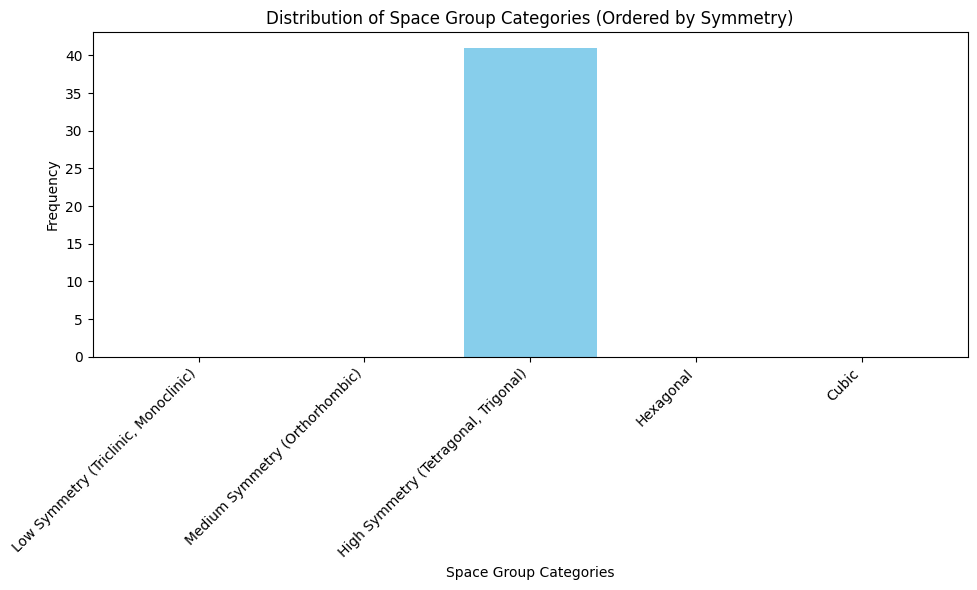

In [379]:
def generate_spacegroup_dict_from_df(factor_df):
    """
    Generate a dictionary mapping MP-ID to space groups and their categories from a factor DataFrame.

    Parameters:
        factor_df (pd.DataFrame): DataFrame containing 'MP-ID' and 'Space Group Number'.

    Returns:
        dict: A dictionary where keys are MP-IDs and values are tuples of (space group number, category).
    """
    
    def group_space_group(space_group_number):
        """Categorizes space groups based on symmetry level."""
        if 1 <= space_group_number <= 15:
            return "Low Symmetry (Triclinic, Monoclinic)"
        elif 16 <= space_group_number <= 74:
            return "Medium Symmetry (Orthorhombic)"
        elif 75 <= space_group_number <= 167:
            return "High Symmetry (Tetragonal, Trigonal)"
        elif 168 <= space_group_number <= 194:
            return "Hexagonal"
        elif 195 <= space_group_number <= 230:
            return "Cubic"
        else:
            return "Unknown"

    # Extract MP-ID and Space Group Number
    spacegroup_dict = {}
    
    for mp_id, row in factor_df.iterrows():
        space_group_number = row["Space Group Number"]
        category = group_space_group(space_group_number)
        spacegroup_dict[mp_id] = (space_group_number, category)

    return spacegroup_dict

def plot_space_group_distribution(spacegroup_dict):
    """
    Plot the distribution of space group categories, ordered from least to most symmetric.

    Parameters:
        spacegroup_dict (dict): A dictionary where values are tuples of (space group number, category).
    """
    # Extract categories from the dictionary
    categories = [group for _, group in spacegroup_dict.values()]

    # Count occurrences of each category
    category_counts = {}
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

    # Define custom order: least to most symmetric
    custom_order = [
        "Low Symmetry (Triclinic, Monoclinic)",
        "Medium Symmetry (Orthorhombic)",
        "High Symmetry (Tetragonal, Trigonal)",
        "Hexagonal",
        "Cubic",
    ]

    # Sort categories by the custom order
    ordered_counts = {cat: category_counts.get(cat, 0) for cat in custom_order}

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(ordered_counts.keys(), ordered_counts.values(), color="skyblue")
    plt.xlabel("Space Group Categories")
    plt.ylabel("Frequency")
    plt.title("Distribution of Space Group Categories (Ordered by Symmetry)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

space_group = generate_spacegroup_dict_from_df(factor_df)
plot_space_group_distribution(space_group)

### Get information about the hexagonal structures

In [380]:
'''
hexagonal_group = {}

for key, value in space_group.items():
    if 168 < value[0] < 194:
        hexagonal_group[key] = value  # Store the entire value list/tuple

# Convert dictionary to DataFrame
hexagonal_df = pd.DataFrame.from_dict(hexagonal_group, orient='index')

# Name columns
hexagonal_df.columns = ["Space Group", "Group Name"]

# Name the index
hexagonal_df.index.name = "Materials"

# Find the intersection of indexes with factor dict
common_indexes = hexagonal_df.index.intersection(factor_df.index)

# Extract the "Aniso Sum QM" column for the common indexes
qm_aniso_sum = factor_df.loc[common_indexes, "Aniso Sum QM"]

# Add the extracted column to hexagonal_df
hexagonal_df.loc[common_indexes, "Aniso Sum QM"] = qm_aniso_sum

# Find the intersection of indexes with sepctra df
common_indexes = hexagonal_df.index.intersection(spectra_df.index)

# Extract the "Aniso Sum QM" column for the common indexes
spectra_aniso_sum = spectra_df.loc[common_indexes, "Normed Sum"]

# Add the extracted column to hexagonal_df
hexagonal_df.loc[common_indexes, "Normed Sum"] = qm_aniso_sum

# Display the updated DataFrame
print(hexagonal_df)
'''


'\nhexagonal_group = {}\n\nfor key, value in space_group.items():\n    if 168 < value[0] < 194:\n        hexagonal_group[key] = value  # Store the entire value list/tuple\n\n# Convert dictionary to DataFrame\nhexagonal_df = pd.DataFrame.from_dict(hexagonal_group, orient=\'index\')\n\n# Name columns\nhexagonal_df.columns = ["Space Group", "Group Name"]\n\n# Name the index\nhexagonal_df.index.name = "Materials"\n\n# Find the intersection of indexes with factor dict\ncommon_indexes = hexagonal_df.index.intersection(factor_df.index)\n\n# Extract the "Aniso Sum QM" column for the common indexes\nqm_aniso_sum = factor_df.loc[common_indexes, "Aniso Sum QM"]\n\n# Add the extracted column to hexagonal_df\nhexagonal_df.loc[common_indexes, "Aniso Sum QM"] = qm_aniso_sum\n\n# Find the intersection of indexes with sepctra df\ncommon_indexes = hexagonal_df.index.intersection(spectra_df.index)\n\n# Extract the "Aniso Sum QM" column for the common indexes\nspectra_aniso_sum = spectra_df.loc[common_ind

### Plot QM Anio Sum v Spectra Aniso Sum

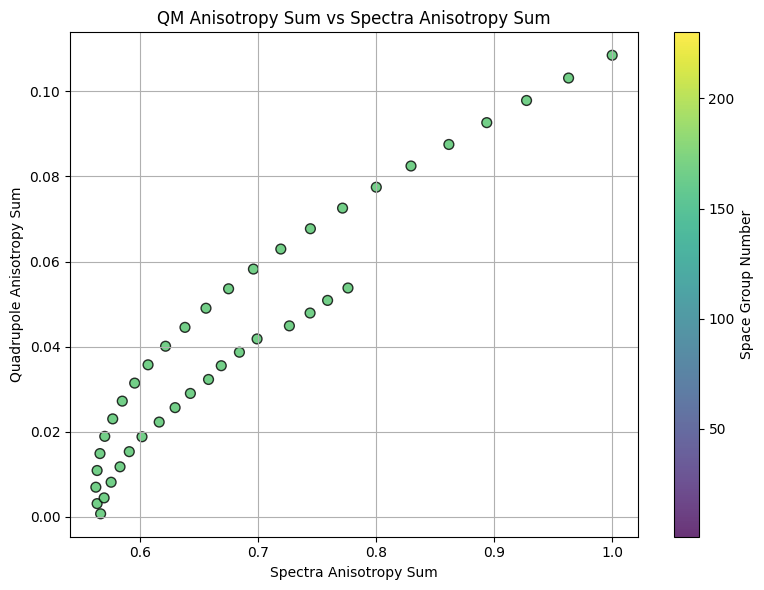

In [381]:
def plot_qm_vs_spectra(factor_df, spectra_df):
    """
    Plot QM anisotropy sum vs Spectra anisotropy sum with space group coloring.

    Assumes factor_df and spectra_df are already cleaned and aligned by MP-ID.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum QM', and 'space group'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'spectra anisotropy sum'.
    """

    # Extract values directly, assuming order is aligned
    qm_aniso_sum = factor_df['Aniso Sum QM'].values  # Quadrupole anisotropy sum
    spectra_aniso_sum = spectra_df['Normed Sum'].values  # Spectra anisotropy sum
    space_group = factor_df['Space Group Number'].values  # Space group column from factor_df

    # Normalize the space group for coloring
    norm = Normalize(vmin=1, vmax=230)
    cmap = cm.viridis

    # Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        spectra_aniso_sum, qm_aniso_sum,
        c=space_group, cmap=cmap, norm=norm, s=50, edgecolor='k', alpha=0.8
    )
    plt.colorbar(scatter, label='Space Group Number')
    plt.xlabel('Spectra Anisotropy Sum')
    plt.ylabel('Quadrupole Anisotropy Sum')
    plt.title('QM Anisotropy Sum vs Spectra Anisotropy Sum')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_qm_vs_spectra(factor_df, spectra_df)


Plot in groups

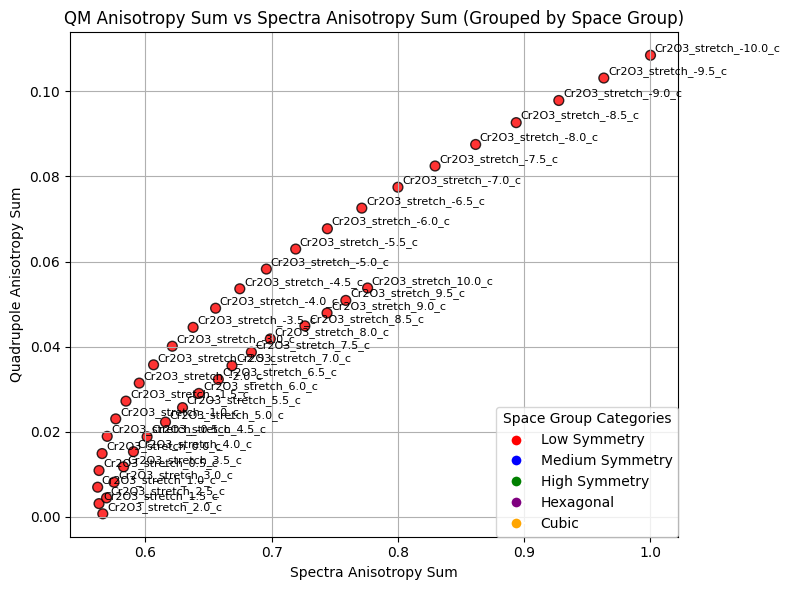

In [382]:
def plot_qm_vs_spectra_grouped(factor_df, spectra_df):
    """
    Plot QM anisotropy sum vs Spectra anisotropy sum with 5 distinct colors 
    based on space group classification, and annotate each point with 
    the corresponding 'Material' value from spectra_df.

    Assumes factor_df and spectra_df are aligned by their indexes or 
    have the same row ordering (e.g., joined by MP-ID).
    
    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum QM', 
                                  'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID', 'normed_sum' 
                                   (Spectra anisotropy sum), 
                                   and 'Material'.
    """

    # Extract values
    qm_aniso_sum = factor_df['Aniso Sum QM'].values
    spectra_aniso_sum = spectra_df['Normed Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return 0  # "Low Symmetry"
        elif 16 <= sg <= 74:
            return 1  # "Medium Symmetry"
        elif 75 <= sg <= 167:
            return 2  # "High Symmetry"
        elif 168 <= sg <= 194:
            return 3  # "Hexagonal"
        elif 195 <= sg <= 230:
            return 4  # "Cubic"
        return -1   # Unknown or out of range

    # Apply classification
    space_group_classes = np.array([classify_space_group(sg) 
                                    for sg in space_group_numbers])

    # Define a colormap with 5 distinct colors
    category_colors = ListedColormap(["red", "blue", "green", "purple", "orange"])
    category_labels = [
        "Low Symmetry",
        "Medium Symmetry",
        "High Symmetry",
        "Hexagonal",
        "Cubic"
    ]

    # Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        spectra_aniso_sum, 
        qm_aniso_sum,
        c=space_group_classes, 
        cmap=category_colors, 
        s=50, 
        edgecolor='k', 
        alpha=0.8
    )

    # Annotate each point with the "Material" from spectra_df
    #   Slight offset so text doesn't overlap the marker
    for i, material_name in enumerate(spectra_df.index):
        plt.annotate(
            material_name,
            xy=(spectra_aniso_sum[i], qm_aniso_sum[i]),
            xytext=(3, 3),  # offset in points
            textcoords="offset points",
            fontsize=8
        )

    # Create legend for the 5 categories
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=color, markersize=8)
        for label, color in zip(category_labels, category_colors.colors)
    ]

    plt.legend(
    handles=legend_elements,
    title="Space Group Categories",
    loc="lower right",
    bbox_to_anchor=(1, 0),  # X=1 means right boundary; Y=0 means bottom
    borderaxespad=0
    )

    # Labels and title
    plt.xlabel('Spectra Anisotropy Sum')
    plt.ylabel('Quadrupole Anisotropy Sum')
    plt.title('QM Anisotropy Sum vs Spectra Anisotropy Sum (Grouped by Space Group)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_qm_vs_spectra_grouped(factor_df,spectra_df)

Break down the plot into individual space groups

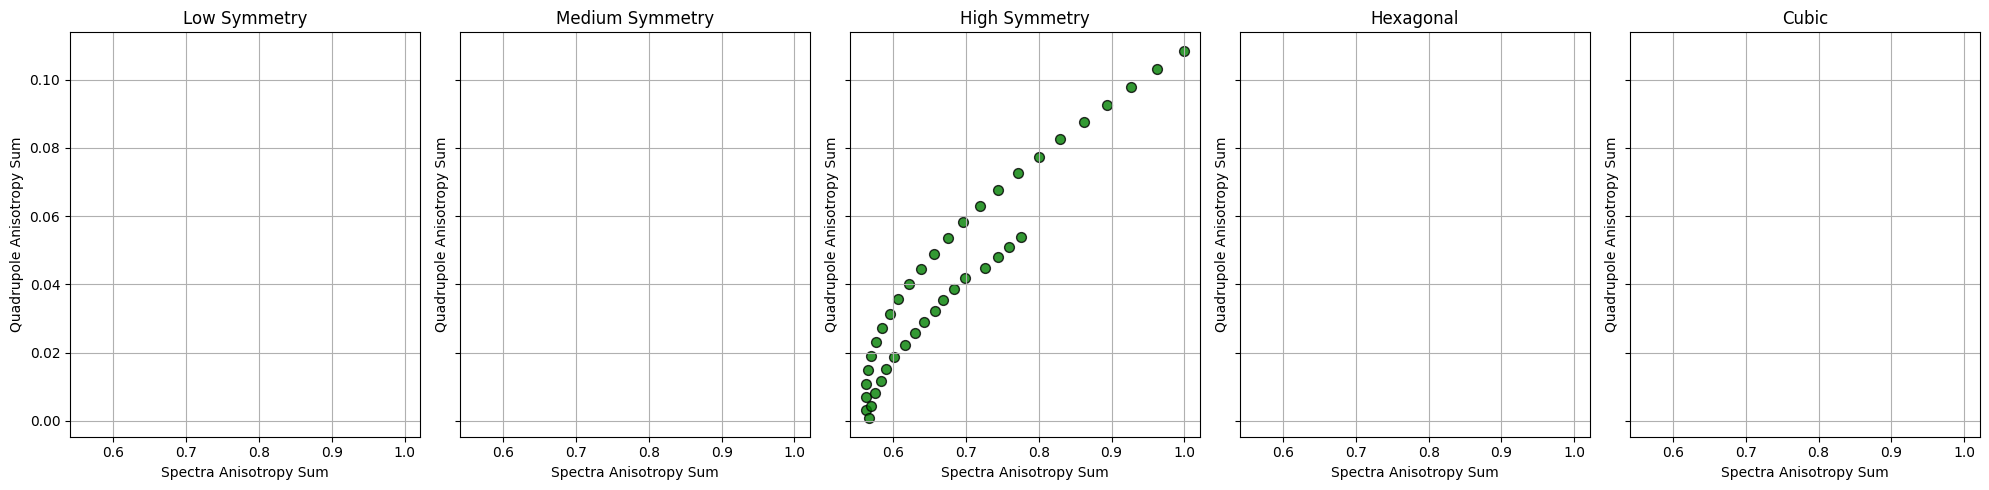

In [383]:
def plot_qm_vs_spectra_by_group(factor_df, spectra_df):
    """
    Create separate scatter plots for each space group category.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum QM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    qm_aniso_sum = factor_df['Aniso Sum QM'].values
    spectra_aniso_sum = spectra_df['Normed Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return "Low Symmetry"
        elif 16 <= sg <= 74:
            return "Medium Symmetry"
        elif 75 <= sg <= 167:
            return "High Symmetry"
        elif 168 <= sg <= 194:
            return "Hexagonal"
        elif 195 <= sg <= 230:
            return "Cubic"
        return "Unknown"

    # Assign categories
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define colors for each category
    category_colors = {
        "Low Symmetry": "red",
        "Medium Symmetry": "blue",
        "High Symmetry": "green",
        "Hexagonal": "purple",
        "Cubic": "orange",
    }

    # Get unique categories
    unique_categories = list(category_colors.keys())

    # Create subplots for each category
    fig, axes = plt.subplots(1, len(unique_categories), figsize=(20, 5), sharex=True, sharey=True)

    for ax, category in zip(axes, unique_categories):
        # Filter data for the current category
        mask = space_group_classes == category
        ax.scatter(spectra_aniso_sum[mask], qm_aniso_sum[mask], color=category_colors[category], s=50, edgecolor='k', alpha=0.8)

        # Titles and labels
        ax.set_title(category)
        ax.set_xlabel("Spectra Anisotropy Sum")
        ax.set_ylabel("Quadrupole Anisotropy Sum")
        ax.grid(True)

    # Overall layout
    plt.tight_layout()
    plt.show()

# Example usage:
plot_qm_vs_spectra_by_group(factor_df, spectra_df)


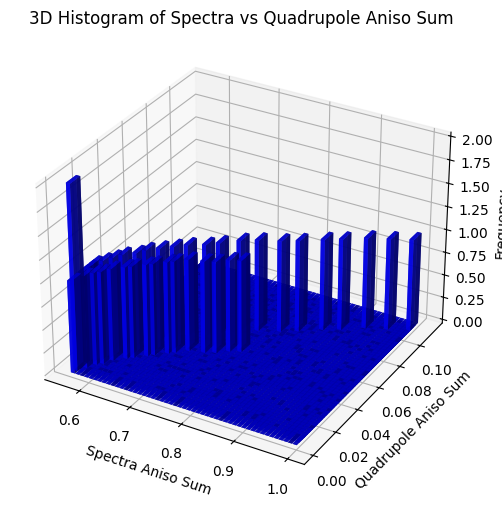

In [384]:
def plot_3d_histogram(factor_df, spectra_df, bins=50):
    """
    Generates a 3D histogram of Spectra Anisotropy Sum vs Quadrupole Anisotropy Sum.

    Args:
        factor_df (pd.DataFrame): DataFrame containing 'Aniso Sum QM' (quadrupole anisotropy sum).
        spectra_df (pd.DataFrame): DataFrame containing 'spectra anisotropy sum'.
        bins (int): Number of bins for the histogram.
    """
    # Extract values
    qm_aniso_sum = factor_df['Aniso Sum QM'].values  # Quadrupole anisotropy sum
    spectra_aniso_sum = spectra_df['Normed Sum'].values  # Spectra anisotropy sum

    # Create histogram data
    hist, xedges, yedges = np.histogram2d(spectra_aniso_sum, qm_aniso_sum, bins=bins)

    # Create 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Constructing the histogram grid
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)

    # Bar dimensions
    dx = dy = (xedges[1] - xedges[0]) * 0.9  # Width and depth of bars
    dz = hist.ravel()  # Height of bars

    # Plot bars
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='blue', alpha=0.8)

    # Labels and title
    ax.set_xlabel("Spectra Aniso Sum")
    ax.set_ylabel("Quadrupole Aniso Sum")
    ax.set_zlabel("Frequency")
    ax.set_title("3D Histogram of Spectra vs Quadrupole Aniso Sum")

    plt.show()

plot_3d_histogram(factor_df, spectra_df)

### Plot Dipole Aniso Sum v Spectra Aniso Sum

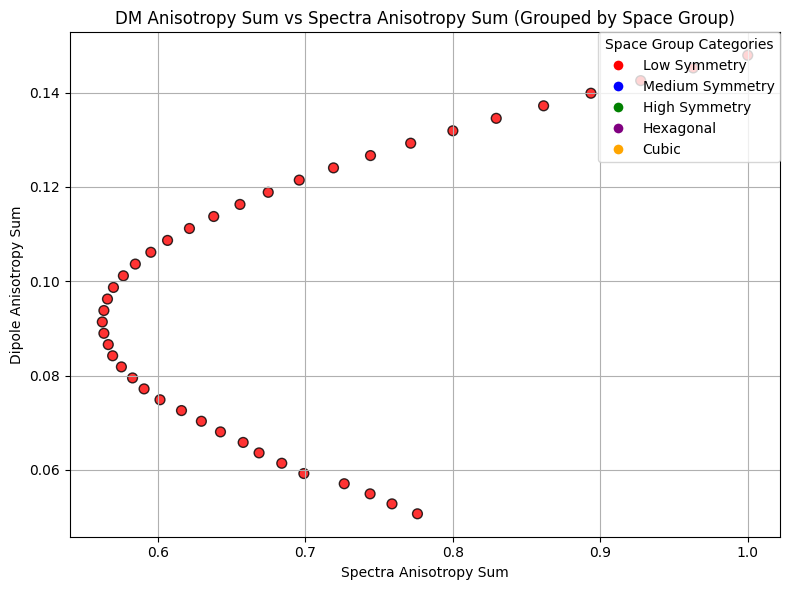

In [385]:
def plot_dm_vs_spectra_grouped(factor_df, spectra_df):
    """
    Plot DM anisotropy sum vs Spectra anisotropy sum with 5 distinct colors based on space group classification.

    Assumes factor_df and spectra_df are already cleaned and aligned by MP-ID.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum DM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    dm_aniso_sum = factor_df['Aniso Sum DM'].values  # Quadrupole anisotropy sum
    spectra_aniso_sum = spectra_df['Normed Sum'].values  # Spectra anisotropy sum
    space_group_numbers = factor_df['Space Group Number'].values  # Space group numbers

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return 0  # "Low Symmetry (Triclinic, Monoclinic)"
        elif 16 <= sg <= 74:
            return 1  # "Medium Symmetry (Orthorhombic)"
        elif 75 <= sg <= 167:
            return 2  # "High Symmetry (Tetragonal, Trigonal)"
        elif 168 <= sg <= 194:
            return 3  # "Hexagonal"
        elif 195 <= sg <= 230:
            return 4  # "Cubic"
        return -1  # Unknown

    # Apply classification
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define a colormap with 5 distinct colors
    category_colors = ListedColormap(["red", "blue", "green", "purple", "orange"])
    category_labels = [
        "Low Symmetry",
        "Medium Symmetry",
        "High Symmetry",
        "Hexagonal",
        "Cubic"
    ]

    # Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        spectra_aniso_sum, dm_aniso_sum,
        c=space_group_classes, cmap=category_colors, s=50, edgecolor='k', alpha=0.8
    )

    # Create legend for the 5 categories
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color, markersize=8)
                       for label, color in zip(category_labels, category_colors.colors)]
    
    plt.legend(
    handles=legend_elements,
    title="Space Group Categories",
    loc="upper right",
    bbox_to_anchor=(1, 1),  # X=1 means right boundary; Y=0 means bottom
    borderaxespad=0
    )
    # Labels and title
    plt.xlabel('Spectra Anisotropy Sum')
    plt.ylabel('Dipole Anisotropy Sum')
    plt.title('DM Anisotropy Sum vs Spectra Anisotropy Sum (Grouped by Space Group)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
 
plot_dm_vs_spectra_grouped(factor_df, spectra_df)

Break down plots into indivdual space groups

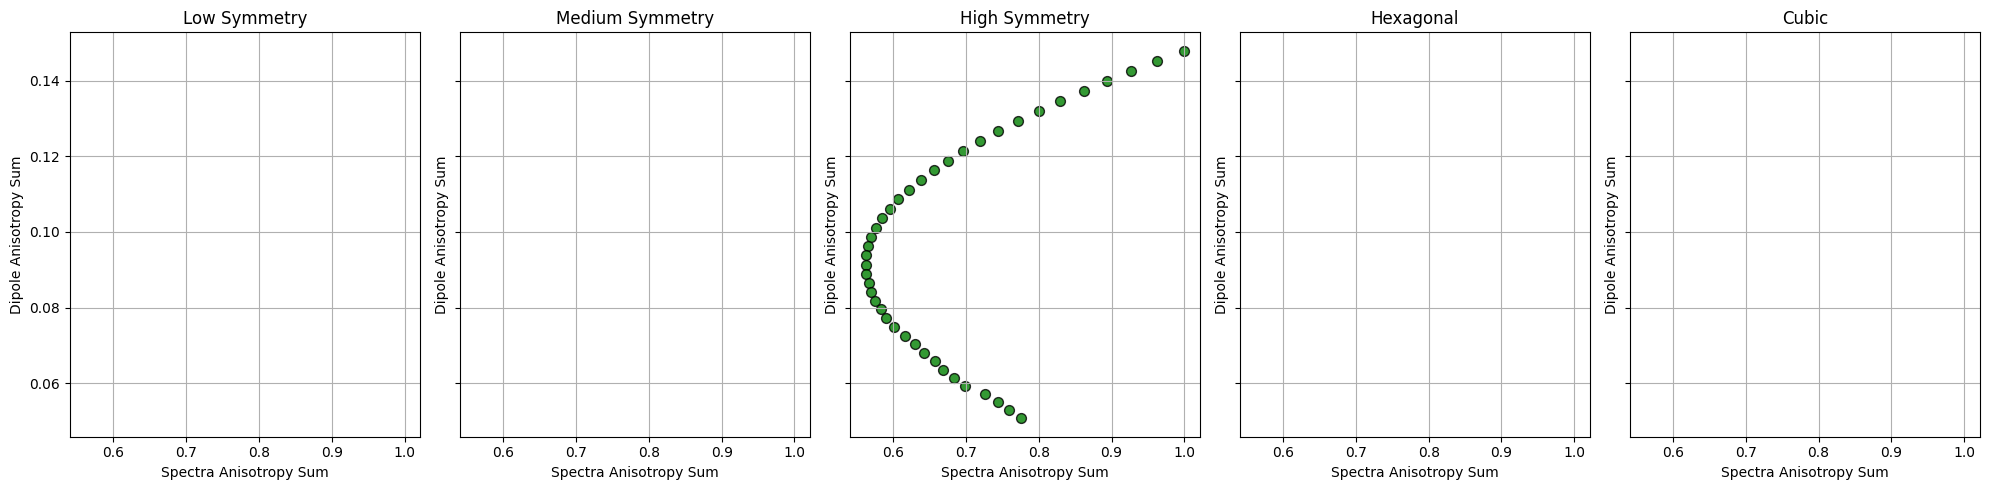

In [386]:
def plot_qm_vs_spectra_by_group(factor_df, spectra_df):
    """
    Create separate scatter plots for each space group category.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum DM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    dm_aniso_sum = factor_df['Aniso Sum DM'].values
    spectra_aniso_sum = spectra_df['Normed Sum'].values
    space_group_numbers = factor_df['Space Group Number'].values

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return "Low Symmetry"
        elif 16 <= sg <= 74:
            return "Medium Symmetry"
        elif 75 <= sg <= 167:
            return "High Symmetry"
        elif 168 <= sg <= 194:
            return "Hexagonal"
        elif 195 <= sg <= 230:
            return "Cubic"
        return "Unknown"

    # Assign categories
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define colors for each category
    category_colors = {
        "Low Symmetry": "red",
        "Medium Symmetry": "blue",
        "High Symmetry": "green",
        "Hexagonal": "purple",
        "Cubic": "orange",
    }

    # Get unique categories
    unique_categories = list(category_colors.keys())

    # Create subplots for each category
    fig, axes = plt.subplots(1, len(unique_categories), figsize=(20, 5), sharex=True, sharey=True)

    for ax, category in zip(axes, unique_categories):
        # Filter data for the current category
        mask = space_group_classes == category
        ax.scatter(spectra_aniso_sum[mask], dm_aniso_sum[mask], color=category_colors[category], s=50, edgecolor='k', alpha=0.8)

        # Titles and labels
        ax.set_title(category)
        ax.set_xlabel("Spectra Anisotropy Sum")
        ax.set_ylabel("Dipole Anisotropy Sum")
        ax.grid(True)

    # Overall layout
    plt.tight_layout()
    plt.show()

# Example usage:
plot_qm_vs_spectra_by_group(factor_df, spectra_df)


### Plot QM Aniso Sum + DM Aniso Sum v Spectra Aniso Sum

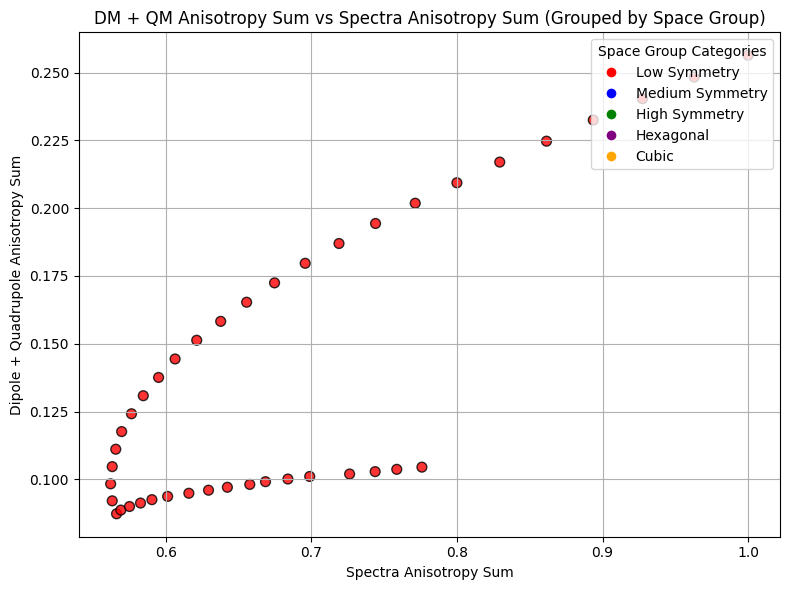

In [387]:
def plot_dm_qm_vs_spectra_grouped(factor_df, spectra_df):
    """
    Plot DM + QM anisotropy sum vs Spectra anisotropy sum with 5 distinct colors based on space group classification.

    Assumes factor_df and spectra_df are already cleaned and aligned by MP-ID.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum DM', 'Aniso Sum QM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    dm_aniso_sum = factor_df['Aniso Sum DM'].values  # Dipole anisotropy sum
    qm_aniso_sum = factor_df['Aniso Sum QM'].values  # Quadrupole anisotropy sum
    dm_qm_aniso_sum = dm_aniso_sum + qm_aniso_sum #Sum of both
    spectra_aniso_sum = spectra_df['Normed Sum'].values  # Spectra anisotropy sum
    space_group_numbers = factor_df['Space Group Number'].values  # Space group numbers

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return 0  # "Low Symmetry (Triclinic, Monoclinic)"
        elif 16 <= sg <= 74:
            return 1  # "Medium Symmetry (Orthorhombic)"
        elif 75 <= sg <= 167:
            return 2  # "High Symmetry (Tetragonal, Trigonal)"
        elif 168 <= sg <= 194:
            return 3  # "Hexagonal"
        elif 195 <= sg <= 230:
            return 4  # "Cubic"
        return -1  # Unknown

    # Apply classification
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define a colormap with 5 distinct colors
    category_colors = ListedColormap(["red", "blue", "green", "purple", "orange"])
    category_labels = [
        "Low Symmetry",
        "Medium Symmetry",
        "High Symmetry",
        "Hexagonal",
        "Cubic"
    ]

    # Plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        spectra_aniso_sum, dm_qm_aniso_sum,
        c=space_group_classes, cmap=category_colors, s=50, edgecolor='k', alpha=0.8
    )

    # Create legend for the 5 categories
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=color, markersize=8)
                       for label, color in zip(category_labels, category_colors.colors)]
    
    plt.legend(handles=legend_elements, title="Space Group Categories", loc='upper right')

    # Labels and title
    plt.xlabel('Spectra Anisotropy Sum')
    plt.ylabel('Dipole + Quadrupole Anisotropy Sum')
    plt.title('DM + QM Anisotropy Sum vs Spectra Anisotropy Sum (Grouped by Space Group)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
 
plot_dm_qm_vs_spectra_grouped(factor_df, spectra_df)

Break down plots into indivdual space groups

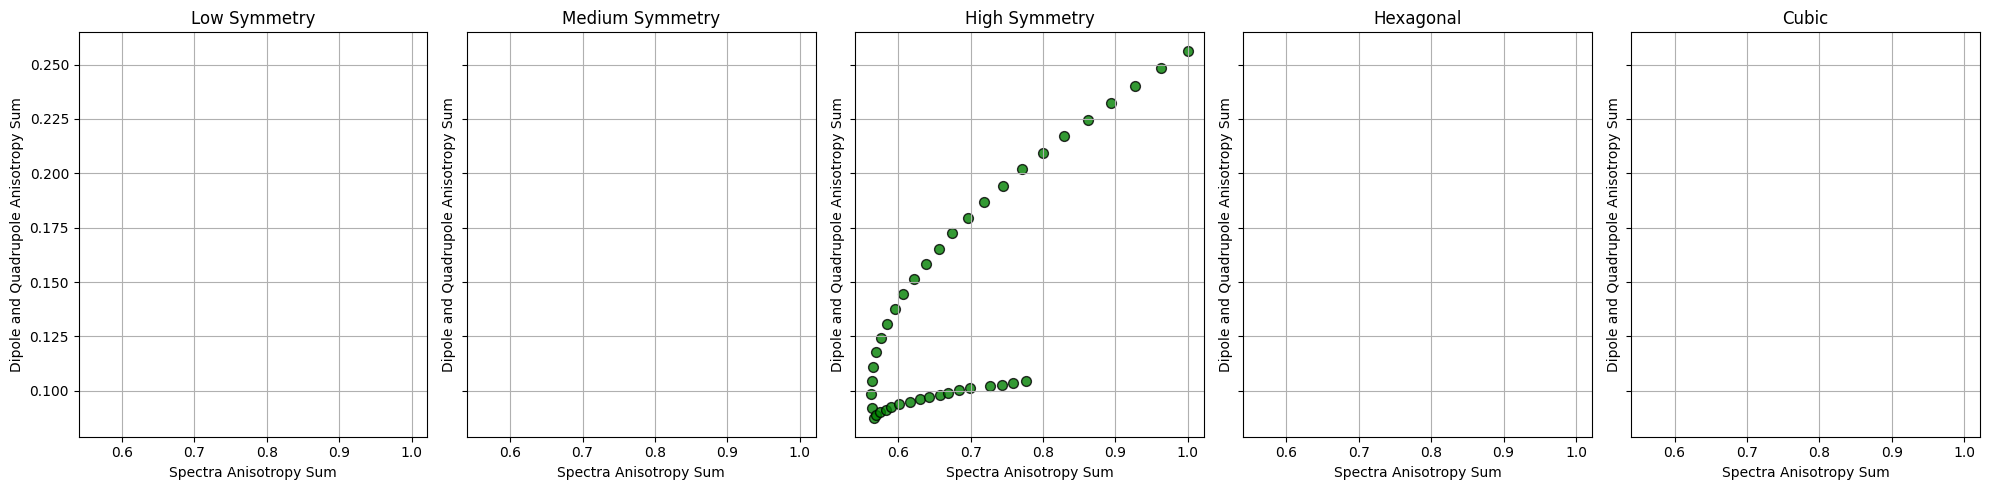

In [388]:
def plot_dm_qm_vs_spectra_by_group(factor_df, spectra_df):
    """
    Create separate scatter plots for each space group category.

    Args:
        factor_df (pd.DataFrame): Contains 'MP-ID', 'Aniso Sum DM', and 'Space Group Number'.
        spectra_df (pd.DataFrame): Contains 'MP-ID' and 'normed_sum' (Spectra anisotropy sum).
    """

    # Extract values
    dm_aniso_sum = factor_df['Aniso Sum DM'].values  # Dipole anisotropy sum
    qm_aniso_sum = factor_df['Aniso Sum QM'].values  # Quadrupole anisotropy sum
    dm_qm_aniso_sum = dm_aniso_sum + qm_aniso_sum #Sum of both
    spectra_aniso_sum = spectra_df['Normed Sum'].values  # Spectra anisotropy sum
    space_group_numbers = factor_df['Space Group Number'].values  # Space group numbers

    # Function to classify space groups
    def classify_space_group(sg):
        if 1 <= sg <= 15:
            return "Low Symmetry"
        elif 16 <= sg <= 74:
            return "Medium Symmetry"
        elif 75 <= sg <= 167:
            return "High Symmetry"
        elif 168 <= sg <= 194:
            return "Hexagonal"
        elif 195 <= sg <= 230:
            return "Cubic"
        return "Unknown"

    # Assign categories
    space_group_classes = np.array([classify_space_group(sg) for sg in space_group_numbers])

    # Define colors for each category
    category_colors = {
        "Low Symmetry": "red",
        "Medium Symmetry": "blue",
        "High Symmetry": "green",
        "Hexagonal": "purple",
        "Cubic": "orange",
    }

    # Get unique categories
    unique_categories = list(category_colors.keys())

    # Create subplots for each category
    fig, axes = plt.subplots(1, len(unique_categories), figsize=(20, 5), sharex=True, sharey=True)

    for ax, category in zip(axes, unique_categories):
        # Filter data for the current category
        mask = space_group_classes == category
        ax.scatter(spectra_aniso_sum[mask], dm_qm_aniso_sum[mask], color=category_colors[category], s=50, edgecolor='k', alpha=0.8)

        # Titles and labels
        ax.set_title(category)
        ax.set_xlabel("Spectra Anisotropy Sum")
        ax.set_ylabel("Dipole and Quadrupole Anisotropy Sum")
        ax.grid(True)

    # Overall layout
    plt.tight_layout()
    plt.show()

# Example usage:
plot_dm_qm_vs_spectra_by_group(factor_df, spectra_df)